In [16]:
%matplotlib inline

In [31]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Read the City and Ride Data
city_data = pd.read_csv("../ClassWork/HW_city_data.csv")
ride_data = pd.read_csv("../ClassWork/HW_ride_data.csv")

#drop any duplicate values
city_data = city_data.drop_duplicates('city')

# Merge the City and Ride Data
city_and_ride_merged = pd.merge(city_data, ride_data, on="city", how="outer")

# Display the data table for preview
city_and_ride_merged.head()
#city_and_ride_merged.dtypes

,city,driver_count,type,date,fare,ride_id
0,Richardfort,38,Urban,2018-02-24 08:40:38,13.93,5628545007794
1,Richardfort,38,Urban,2018-02-13 12:46:07,14.00,910050116494
2,Richardfort,38,Urban,2018-02-16 13:52:19,17.92,820639054416
3,Richardfort,38,Urban,2018-02-01 20:18:28,10.26,9554935945413
4,Richardfort,38,Urban,2018-04-17 02:26:37,23.00,720020655850


## Bubble Plot of Ride Sharing Data

In [18]:
# Splice data into city types Rural, Suburban or Urban

rural = city_and_ride_merged.loc[(city_and_ride_merged["type"] == 'Rural')]
suburban = city_and_ride_merged.loc[(city_and_ride_merged["type"] == 'Suburban')]
urban = city_and_ride_merged.loc[(city_and_ride_merged["type"] == 'Urban')]

In [19]:
#Per city calculations of Average fare, total rides, and Total drivers by city type

rides_per_city_rural = rural.groupby(['city'])['ride_id'].count()
average_fare_rural = rural.groupby(['city'])['fare'].mean()
driver_count_rural = rural.groupby(['city'])['driver_count'].value_counts()

rides_per_city_suburban = suburban.groupby(['city'])['ride_id'].count()
average_fare_suburban = suburban.groupby(['city'])['fare'].mean()
driver_count_suburban = suburban.groupby(['city'])['driver_count'].value_counts()

rides_per_city_urban = urban.groupby(['city'])['ride_id'].count()
average_fare_urban = urban.groupby(['city'])['fare'].mean()
driver_count_urban = urban.groupby(['city'])['driver_count'].value_counts()

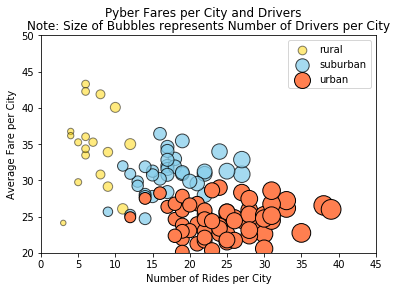

In [33]:
# Build the scatter plots for each city types(x_axis, y,axis, s=size)
plt.scatter(rides_per_city_rural,average_fare_rural, s = driver_count_rural*10, marker ='o', facecolors ="Gold", edgecolors='black', alpha=0.5, label="rural")
plt.scatter(rides_per_city_suburban, average_fare_suburban, s = driver_count_suburban*10, marker ='o', facecolor="SkyBlue", edgecolors='black', label="suburban", alpha=0.75)
plt.scatter(rides_per_city_urban, average_fare_urban, s = driver_count_urban*10, marker ='o', facecolor="Coral", edgecolors='black', alpha=1.0, label="urban")


# Incorporate the other graph properties
#set x & y limits
plt.xlim(0,45)
plt.ylim(20,50)

#Add title descriptions
plt.suptitle("Pyber Fares per City and Drivers")
plt.title("Note: Size of Bubbles represents Number of Drivers per City")
plt.xlabel("Number of Rides per City")
plt.ylabel("Average Fare per City")

# Create a legend
plt.legend(loc='upper right')
# Incorporate a text label regarding circle size

# Save Figure
plt.savefig("Pyber_plot")
plt.show()

## Total Fares by City Type

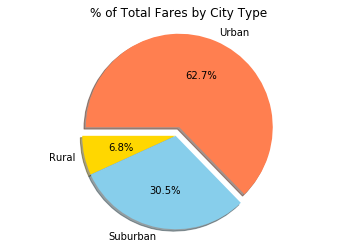

In [34]:
# Calculate Type Percents
Fare_by_type = city_and_ride_merged.groupby('type')['fare'].sum()

#use .keys() function so don't have to manually type in titles
labels = Fare_by_type.keys()
colors = ["Gold", "SkyBlue", "Coral"]
explode = [0,0,0.1]


# Build Pie Chart
plt.pie(Fare_by_type, explode=explode, labels=labels, colors=colors, autopct="%1.1f%%", startangle=180, shadow=True)
plt.axis('equal')

# Add a Title
plt.title("% of Total Fares by City Type")



# Save Figure
plt.savefig("Fares_pie")
plt.show()

## Total Rides by City Type

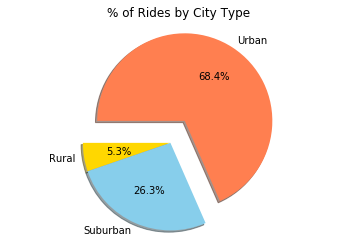

In [35]:
# Calculate Type Percents
Rides_by_type = city_and_ride_merged.groupby('type')['ride_id'].count()

##use .keys() function so don't have to manually type in titles
labels = Rides_by_type.keys()
colors = ["Gold", "SkyBlue", "Coral"]
explode = [0,0,0.3]


# Build Pie Chart
plt.pie(Rides_by_type, explode=explode, labels=labels, colors=colors, autopct="%1.1f%%", startangle=180, shadow=True)
plt.axis('equal')

#Add a title
plt.title("% of Rides by City Type")

# Save Figure
plt.savefig("RidebyCity_Pie")
plt.show()

## Total Drivers by City Type

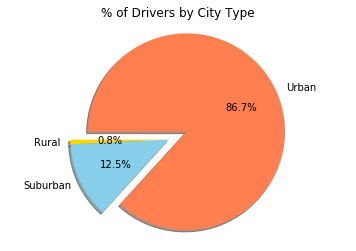

In [30]:
# Calculate Type Percents
Drivers_by_CityType = city_and_ride_merged.groupby('type')['driver_count'].sum()

labels = Drivers_by_CityType.keys()
colors = ["Gold", "SkyBlue", "Coral"]
explode = [0,0,0.2]


# Build Pie Chart
plt.pie(Drivers_by_CityType, explode=explode, labels=labels, colors=colors, autopct="%1.1f%%", startangle=180, shadow=True)
plt.axis('equal')

#Add a title
plt.title("% of Total Drivers by City Type")

# Save Figure
plt.savefig("DriversCity_Pie")
plt.show()